<a href="https://colab.research.google.com/github/ismailhossain254/TechnocolabsProject/blob/main/Project_of_Technocolabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import os 
import warnings
warnings.filterwarnings("ignore")
import matplotlib
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# Loading dataset & PreProcessing

In [ ]:
raw_data = pd.read_csv('/Users/SalmaDkier/Documents/Codings/Technocollabs/Predicting-Mortgage-Backed-Securities-Prepayment-Risk-Prediction/LoanExport.csv')

In [ ]:
raw_data.head(20)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,...,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,...,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,...,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,...,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,...,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


In [ ]:
raw_data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [ ]:
raw_data["EverDelinquent"].value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

In [ ]:
raw_data.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


# Exploratory data analysis

In [ ]:
missing_data = pd.DataFrame({'total_missing':raw_data.isnull().sum(), 'perc_missing':(raw_data.isnull().sum()/291451)*100})
missing_data

,total_missing,perc_missing
CreditScore,0,0.000000
FirstPaymentDate,0,0.000000
FirstTimeHomebuyer,0,0.000000
MaturityDate,0,0.000000
MSA,0,0.000000
MIP,0,0.000000
Units,0,0.000000
Occupancy,0,0.000000
OCLTV,0,0.000000
DTI,0,0.000000


In [ ]:
raw_data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [ ]:
raw_data['SellerName'].value_counts()

Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64

In [ ]:
raw_data = raw_data.dropna(axis=0)

In [ ]:
duplicate_rows = raw_data.duplicated()

print(f'Number of duplicate rows: {sum(duplicate_rows)}')

Number of duplicate rows: 0


In [ ]:
raw_data.drop_duplicates(inplace=True)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266457 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         266457 non-null  int64  
 1   FirstPaymentDate    266457 non-null  int64  
 2   FirstTimeHomebuyer  266457 non-null  object 
 3   MaturityDate        266457 non-null  int64  
 4   MSA                 266457 non-null  object 
 5   MIP                 266457 non-null  int64  
 6   Units               266457 non-null  int64  
 7   Occupancy           266457 non-null  object 
 8   OCLTV               266457 non-null  int64  
 9   DTI                 266457 non-null  int64  
 10  OrigUPB             266457 non-null  int64  
 11  LTV                 266457 non-null  int64  
 12  OrigInterestRate    266457 non-null  float64
 13  Channel             266457 non-null  object 
 14  PPM                 266457 non-null  object 
 15  ProductType         266457 non-nul

In [ ]:
raw_data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [ ]:
num1_cols = raw_data.describe(include='all')
num1_cols

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,266457.000000,266457.000000,266457,266457.000000,266457,266457.000000,266457.000000,266457,266457.000000,266457.000000,...,266457,266457,266457,266457.000000,266457,266457,266457,266457.000000,266457.000000,266457.000000
unique,NaN,NaN,3,NaN,392,NaN,NaN,3,NaN,NaN,...,1762,266457,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,NaN,N,NaN,X,NaN,NaN,O,NaN,NaN,...,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,NaN,171929,NaN,36460,NaN,NaN,252566,NaN,NaN,...,2444,1,111720,NaN,172032,76943,62176,NaN,NaN,NaN
mean,708.915097,199904.784701,NaN,202902.327216,NaN,9.121085,1.025907,NaN,76.883970,30.038708,...,NaN,NaN,NaN,359.826565,NaN,NaN,NaN,0.198212,1.831083,60.637994
std,68.301151,14.323051,NaN,16.416401,NaN,12.619794,0.202276,NaN,15.192873,13.338958,...,NaN,NaN,NaN,2.354774,NaN,NaN,NaN,0.398654,8.760016,45.773241
min,0.000000,199901.000000,NaN,202402.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,NaN,202902.000000,NaN,0.000000,1.000000,NaN,70.000000,22.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,35.000000
50%,717.000000,199904.000000,NaN,202903.000000,NaN,0.000000,1.000000,NaN,80.000000,31.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,NaN,202904.000000,NaN,25.000000,1.000000,NaN,90.000000,39.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,63.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


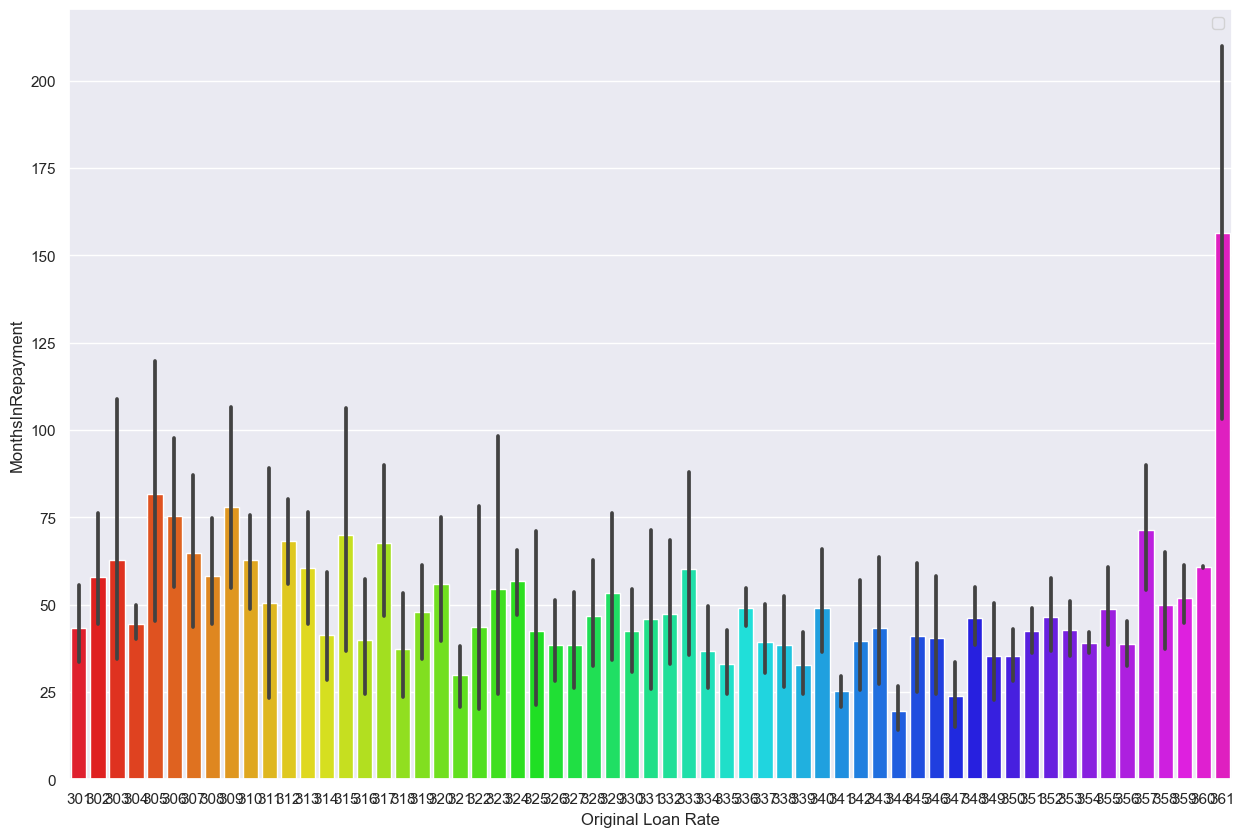

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot('OrigLoanTerm','MonthsInRepayment',data=raw_data,palette='gist_rainbow')
plt.xlabel('Original Loan Rate')
plt.legend()
plt.show()

# Feature Engineering

# Dropping Columns & Adding new ones

In [ ]:
raw_data = raw_data.drop('FirstPaymentDate', axis=1)


In [ ]:
raw_data = raw_data.drop('MaturityDate', axis=1)

In [ ]:
raw_data.drop('MSA', axis=1,inplace=True)

In [ ]:
raw_data.drop('Occupancy', axis=1,inplace=True)

In [ ]:
raw_data.drop('Channel', axis=1,inplace=True)

In [ ]:
raw_data.drop('PPM', axis=1,inplace=True)

In [ ]:
raw_data.drop('ProductType', axis=1,inplace=True)

In [ ]:
raw_data.drop('PropertyState', axis=1,inplace=True)

In [ ]:
raw_data.drop('PropertyType', axis=1,inplace=True)

In [ ]:
raw_data.drop('NumBorrowers', axis=1,inplace=True)

In [ ]:
raw_data.drop('SellerName', axis=1,inplace=True)

In [ ]:
raw_data.drop('ServicerName', axis=1,inplace=True)

In [ ]:
raw_data.drop('FirstTimeHomebuyer', axis=1 ,inplace=True)


In [ ]:
raw_data.drop('LoanSeqNum', axis=1 ,inplace=True)


In [ ]:
raw_data.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PostalCode,LoanPurpose,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,25,1,89,27,117000,89,6.750,60400,P,360,0,0,52
1,0,0,1,73,17,109000,73,6.500,80200,N,360,0,0,144
2,0,0,1,75,16,88000,75,6.875,66000,N,360,0,0,67
3,0,0,1,76,14,160000,76,6.875,90700,N,360,0,0,35
4,0,0,1,78,18,109000,78,7.125,7600,N,360,0,0,54


In [ ]:
raw_data.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

 Loan Purpose

In [ ]:
raw_data['LoanPurpose'].value_counts()

P    111720
N    100238
C     54499
Name: LoanPurpose, dtype: int64

In [ ]:
encoded_data = pd.get_dummies(raw_data['LoanPurpose'], prefix='LoanPurpose')
raw_data = pd.concat([raw_data, encoded_data], axis=1)


In [ ]:
raw_data.drop('LoanPurpose', axis=1,inplace=True)

In [ ]:
raw_data['PostalCode'].value_counts()

94500    2444
30000    2140
48100    2078
85200    1961
48000    1922
         ... 
55600       1
36900       1
26400       1
5900        1
41300       1
Name: PostalCode, Length: 1762, dtype: int64

In [ ]:
raw_data.drop(['PostalCode'], axis=1,inplace=True)

In [ ]:
raw_data.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P'],
      dtype='object')

In [ ]:
raw_data.dtypes

CreditScore            int64
MIP                    int64
Units                  int64
OCLTV                  int64
DTI                    int64
OrigUPB                int64
LTV                    int64
OrigInterestRate     float64
OrigLoanTerm           int64
EverDelinquent         int64
MonthsDelinquent       int64
MonthsInRepayment      int64
LoanPurpose_C          uint8
LoanPurpose_N          uint8
LoanPurpose_P          uint8
dtype: object

# Dealing with ouliers 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

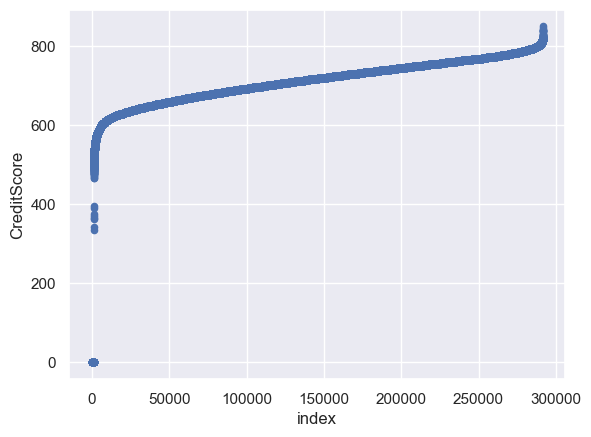

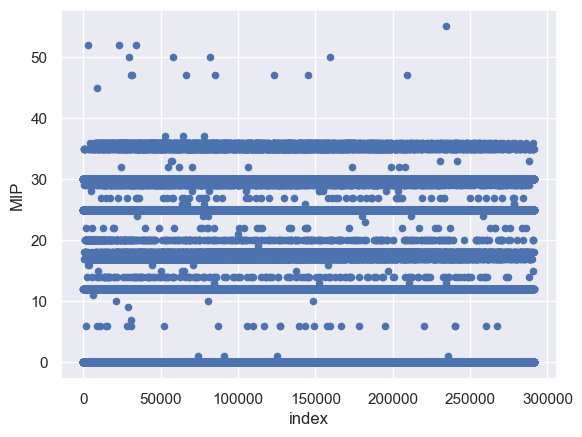

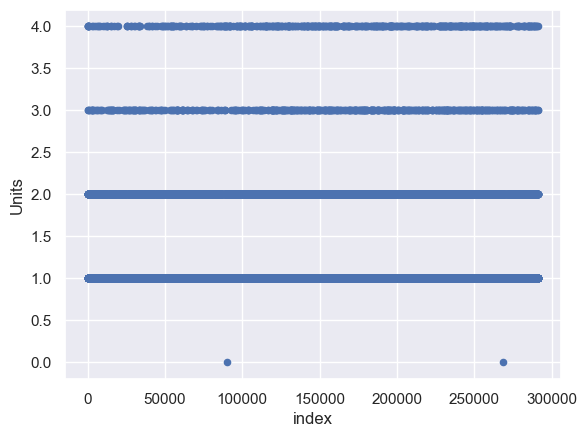

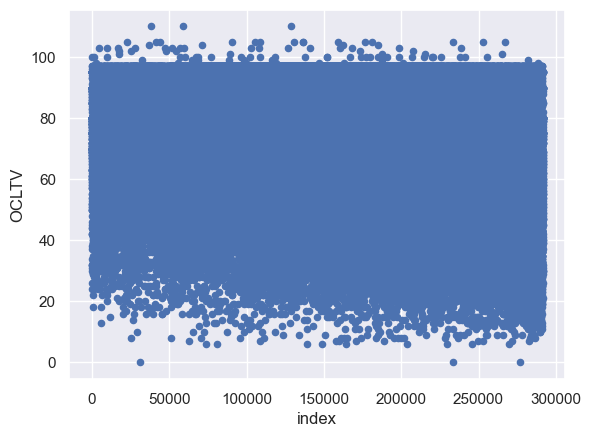

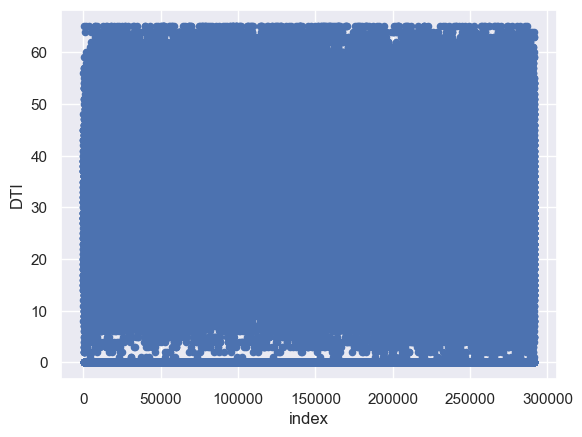

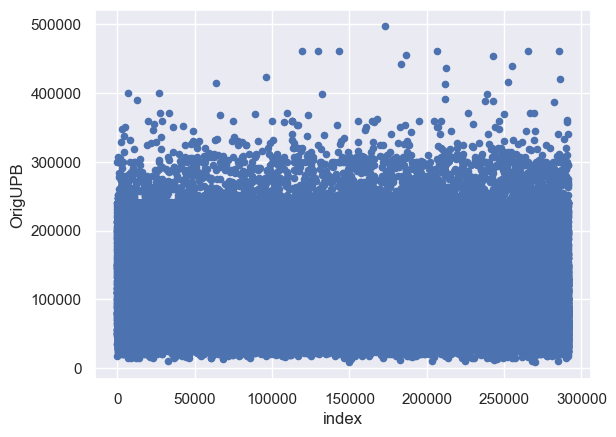

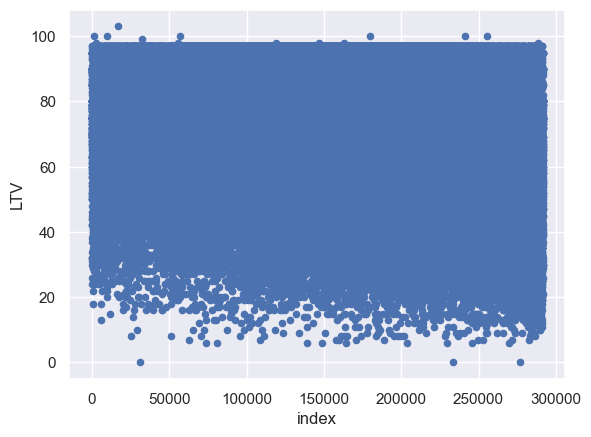

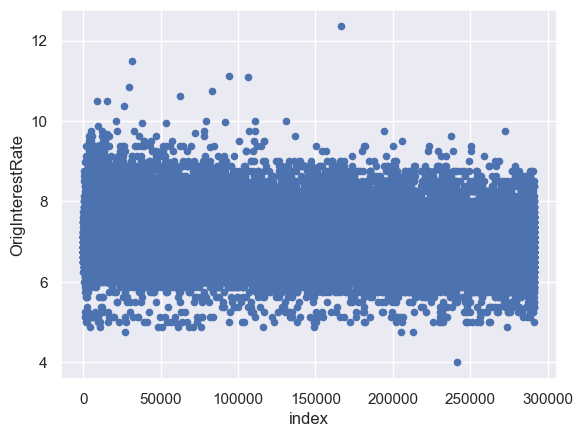

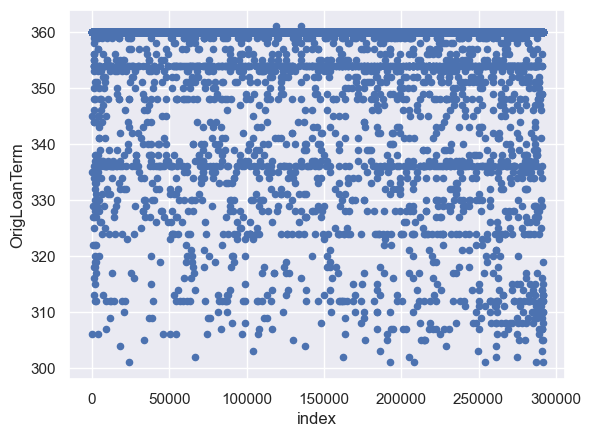

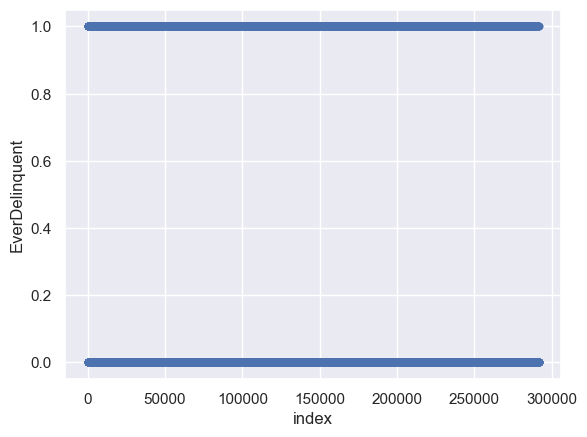

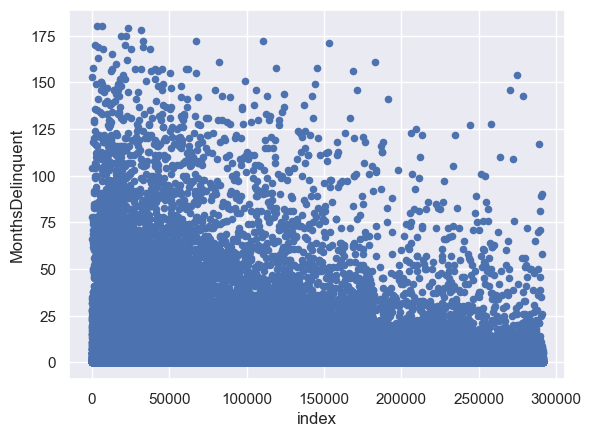

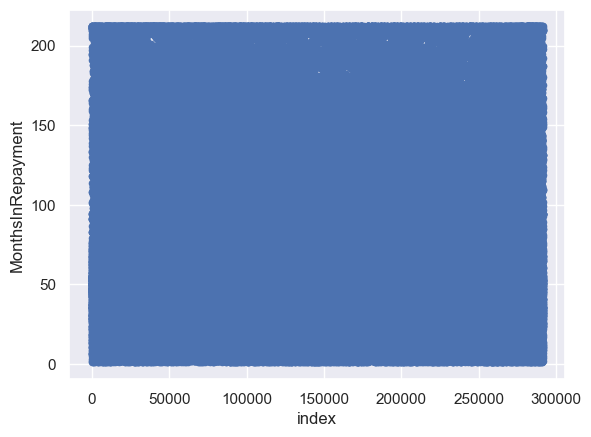

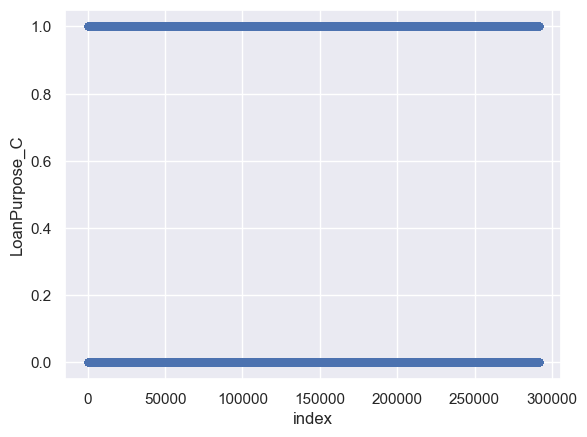

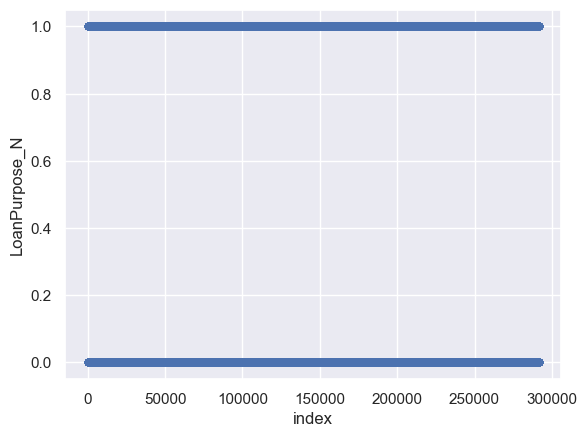

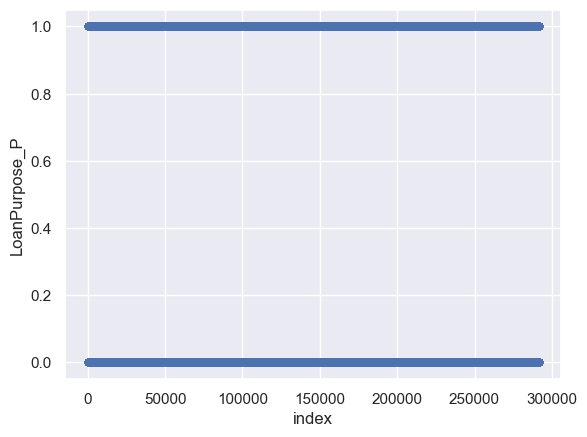

In [ ]:
for column in raw_data.columns:
    raw_data.reset_index().plot.scatter( x= 'index' , y=column )

In [ ]:
raw_data.drop(raw_data[raw_data['Units'] == '0'].index, inplace = True)
raw_data.shape

(266457, 15)

In [ ]:
upper = np.where(raw_data['Units'] <= 0)
raw_data.drop(upper[0], inplace = True)


upper1 = np.where(raw_data['OrigUPB'] >= 400000)
raw_data.drop(upper1[0], inplace = True)



In [ ]:
upper2 = np.where(raw_data['OrigInterestRate'] >= 12 )
raw_data.drop(upper2[0], inplace = True)
raw_data.shape


(266454, 15)

In [ ]:
upper3 = np.where(raw_data['OrigInterestRate'] <= 4  )
raw_data.drop(upper3[0], inplace = True)
raw_data.shape

(266453, 15)

In [ ]:
raw_data['EverDelinquent'].value_counts()

0    213639
1     52814
Name: EverDelinquent, dtype: int64

# Adding new columns

In [ ]:
import pandas as pd

def calculate_credit_range(row):
    if row['CreditScore'] >= 750:
        return 'excellent'
    elif row['CreditScore'] >= 700:
        return 'good'
    elif row['CreditScore'] >= 650:
        return 'fair'
    else:
        return 'poor'
    
def calculate_ltv_range(row):
    if row['LTV'] < 75:
        return 'low'
    elif row['LTV'] >= 75 and row['LTV'] < 80:
        return 'medium'
    elif row['LTV'] >= 80 and row['LTV'] < 90:
        return 'high'
    else:
        return 'very high'
    
def calculate_repay_range(row):
    if row['OrigInterestRate'] < 4:
        return 'low'
    elif row['OrigInterestRate'] >= 4 and row['OrigInterestRate'] < 6:
        return 'medium'
    else:
        return 'high'

def calculate_is_first_time(row):
    if row['EverDelinquent'] == 0:
        return 1
    else:
        return 0

raw_data['CreditRange'] = raw_data.apply(calculate_credit_range, axis=1)
raw_data['LTVRange'] = raw_data.apply(calculate_ltv_range, axis=1)
raw_data['RepayRange'] = raw_data.apply(calculate_repay_range, axis=1)
raw_data['IsFirstTime'] = raw_data.apply(calculate_is_first_time, axis=1)

# convert categorical ranges to numerical features
credit_range_dummies = pd.get_dummies(raw_data['CreditRange'], prefix='CreditRange')
ltv_range_dummies = pd.get_dummies(raw_data['LTVRange'], prefix='LTVRange')
repay_range_dummies = pd.get_dummies(raw_data['RepayRange'], prefix='RepayRange')

# concatenate the newly created numerical features to the original data
raw_data = pd.concat([raw_data, credit_range_dummies, ltv_range_dummies, repay_range_dummies], axis=1)

# drop the original categorical ranges
raw_data = raw_data.drop(['CreditRange', 'LTVRange', 'RepayRange'], axis=1)


In [ ]:
raw_data.isnull().sum()

CreditScore              0
MIP                      0
Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
LTV                      0
OrigInterestRate         0
OrigLoanTerm             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
LoanPurpose_C            0
LoanPurpose_N            0
LoanPurpose_P            0
IsFirstTime              0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
CreditRange_poor         0
LTVRange_high            0
LTVRange_low             0
LTVRange_medium          0
LTVRange_very high       0
RepayRange_high          0
RepayRange_medium        0
dtype: int64

In [ ]:
X = raw_data.copy()
y = X.pop("EverDelinquent")


discrete_features = X.dtypes == int

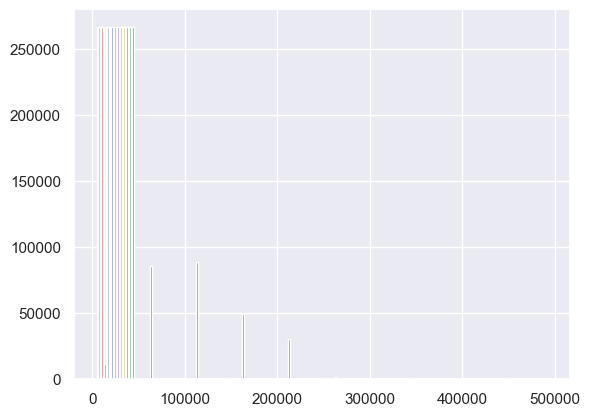

In [ ]:
plt.hist(X)
plt.show()


In [ ]:
X = (X - X.min()) / (X.max() - X.min())


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
raw_data = scaler.fit_transform(X)


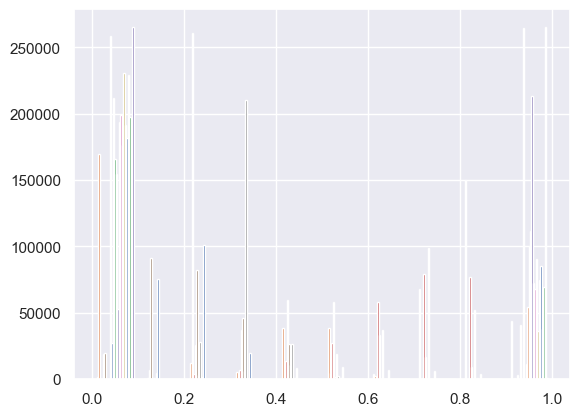

In [ ]:
plt.hist(X)
plt.show()


In [ ]:
#X = pd.DataFrame(X)

# Compute the correlation matrix
corr_matrix = X.corr()

# Print the correlation matrix
print(corr_matrix)

                       CreditScore       MIP     Units     OCLTV       DTI  \
CreditScore               1.000000 -0.164295  0.003980 -0.192326 -0.103429   
MIP                      -0.164295  1.000000 -0.041186  0.694394  0.120392   
Units                     0.003980 -0.041186  1.000000 -0.045289  0.013246   
OCLTV                    -0.192326  0.694394 -0.045289  1.000000  0.121984   
DTI                      -0.103429  0.120392  0.013246  0.121984  1.000000   
OrigUPB                   0.002988  0.007479  0.042786  0.105843  0.067886   
LTV                      -0.192484  0.695360 -0.045203  0.999493  0.121572   
OrigInterestRate         -0.119587  0.131582  0.072913  0.098871  0.115055   
OrigLoanTerm             -0.008806  0.016440  0.005297  0.020094  0.028129   
MonthsDelinquent         -0.150426  0.052295 -0.004641  0.060704  0.044098   
MonthsInRepayment        -0.004140 -0.087836  0.026503 -0.094823 -0.001778   
LoanPurpose_C             0.012246 -0.329849  0.002350 -0.309519

# Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::] 

IsFirstTime              0.504790
MonthsDelinquent         0.502955
CreditScore              0.033697
MonthsInRepayment        0.027993
CreditRange_poor         0.019556
CreditRange_excellent    0.015401
OrigLoanTerm             0.006953
Units                    0.006874
CreditRange_fair         0.005832
MIP                      0.005647
OrigUPB                  0.004737
LoanPurpose_P            0.003782
LTVRange_low             0.003546
CreditRange_good         0.003378
DTI                      0.003283
OrigInterestRate         0.003041
RepayRange_high          0.002493
LTVRange_high            0.002121
LTV                      0.001304
OCLTV                    0.001224
LTVRange_very high       0.001094
LoanPurpose_N            0.001042
LTVRange_medium          0.000831
LoanPurpose_C            0.000000
RepayRange_medium        0.000000
Name: MI Scores, dtype: float64

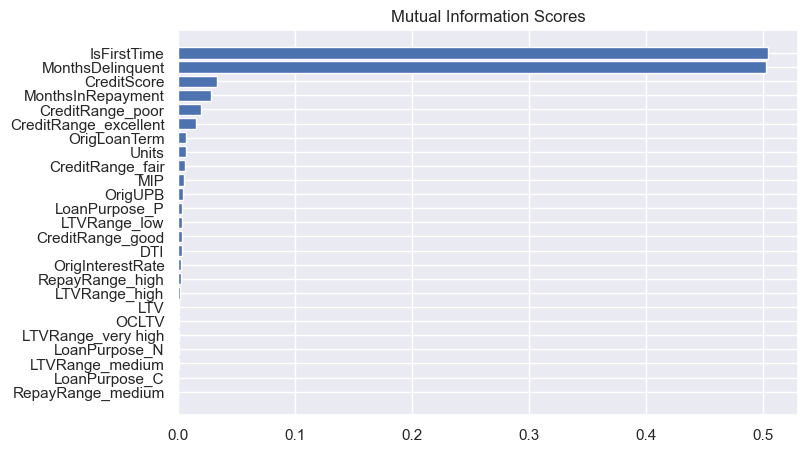

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


# Define the number of top features to select
N = 6

# Select top N features based on mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=N)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices].tolist()



In [ ]:
df_selected = pd.DataFrame(X_selected)

df_selected.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split


# separate features and labels
import pandas as pd
df_selected = pd.DataFrame(X_selected)
features = df_selected

df_labels = pd.DataFrame(y)
labels = df_labels["EverDelinquent"]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
features.shape

(266453, 6)

In [ ]:
labels.shape

(266453,)

In [ ]:
labels.value_counts()

0    213639
1     52814
Name: EverDelinquent, dtype: int64

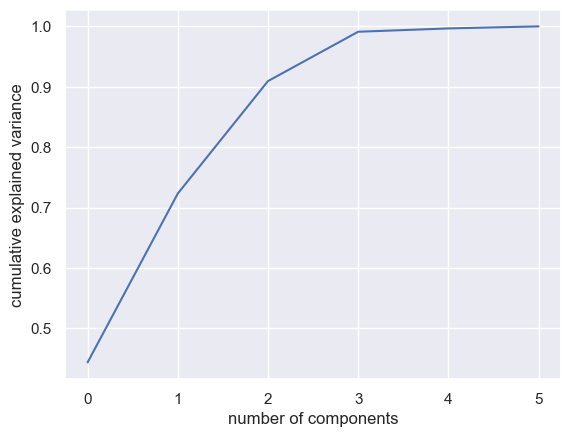

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


# Balancing Data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(features, labels)


In [ ]:
y_resampled.value_counts()

0    213639
1    213639
Name: EverDelinquent, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# initialize the logistic regression model
log_reg = LogisticRegression()

# train the model using cross-validation
scores = cross_val_score(log_reg, X_resampled, y_resampled, cv=5)

# print the mean accuracy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 1.00 (+/- 0.00)


In [ ]:
# import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# create an instance of the class
log_reg = LogisticRegression()

# fit the model to the training data
log_reg.fit(X_resampled, y_resampled)
from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# make predictions on the test set
y_pred = log_reg.predict(X_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 1.00 (+/- 0.00)


In [ ]:
from sklearn.metrics import accuracy_score

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# print accuracy
print("Accuracy: ", accuracy)

Accuracy:  1.0
